## Carfree Living in SLC (Visualization)

Using a geojson for the plats (city blocks) and a csv for the distances (both data sets have plat identifiers in common), I'm trying to make a choropleth of Salt Lake City according to each block's distance tot the nearest train station.

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import geopandas as gpd
plats = gpd.read_file('Atlas_Plat_Index.geojson')
stations = gpd.read_file('Light Rail Stations in Utah.geojson')
#This "plats" is a geodataframe

In [19]:
#I'm dropping all these columns because they're useless, really
plats.drop(['PLAT','DOWNLOAD','LINK','CP_URL'],inplace=True,axis=1,errors='ignore')
plats = plats.sort_values('OBJECTID')
plats = plats.reset_index(drop=True)
plats.tail()

,OBJECTID,PLATNAME,Shape_Leng,Shape_Area,geometry
172,173,Plat 69,4348.786338,9.501281e+05,"POLYGON ((1524891.067568939 7433913.897039089,..."
173,174,Block 2,11192.549480,7.818712e+06,"POLYGON ((1523729.301847629 7436205.913780926,..."
174,175,Plat 29,7888.950526,3.946270e+06,"POLYGON ((1520665.757449167 7447938.526472671,..."
175,176,Plat 31,8025.079790,4.102729e+06,"POLYGON ((1521433.348761903 7446892.001006464,..."
176,177,Plat 63,4291.315852,8.529496e+05,"POLYGON ((1520666.052724176 7447934.645246821,..."


In [20]:
#"data" is just a panda df and I should be able to add the 'minutes' column to plats
data = pd.read_csv('plat_distances.csv')
data.dtypes

identifier      int64
 minutes      float64
dtype: object

But it doesn't work, so I commented it out.
CORRECTION: 

In [21]:
plats['MINUTES'] = data[' minutes']

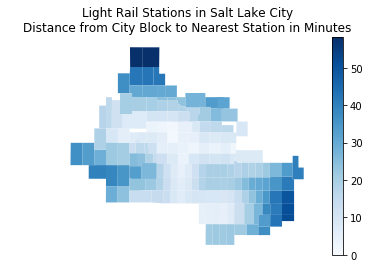

In [53]:
plats.plot(column='MINUTES', cmap= "Blues", legend = True)
plt.axis('off')
plt.title('Light Rail Stations in Salt Lake City\nDistance from City Block to Nearest Station in Minutes')

In [10]:
#gpd.GeoDataFrame.to_file(ut, 'utah_counties.GeoJSON', driver="GeoJSON", schema=None)